In [3]:
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python numpy matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,748 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [4]:
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"


How many questions are there? 5
How many options are there for each question? 4 or 5? 5
Enter the correct answers for each of the 5 questions (from A to E):
Answer for question 1: A
Answer for question 2: B
Answer for question 3: C
Answer for question 4: C
Answer for question 5: B


Saving sheet.png to sheet (3).png


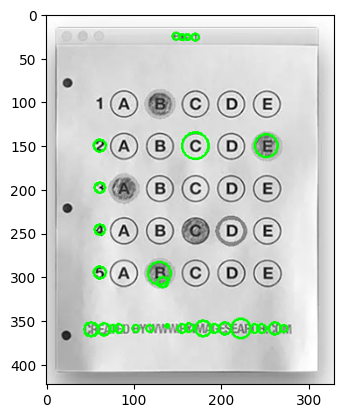

Total Marks: 3 out of 5


In [9]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
from google.colab import files

# Set up pytesseract path (this works in Colab)
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

# Function to get answer key
def get_answer_key(num_questions, num_options):
    answer_key = []
    print(f"Enter the correct answers for each of the {num_questions} questions (from A to {chr(64 + num_options)}):")
    for i in range(num_questions):
        answer = input(f"Answer for question {i+1}: ")
        answer_key.append(answer.upper())  # Ensure the answer is in uppercase (A, B, C, etc.)
    return answer_key

# Function to scan the bubble sheet and detect answers
def scan_bubble_sheet(image_path, num_questions, num_options):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Pre-process the image: thresholding to get a binary image
    _, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours (potential bubble regions)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area to filter out irrelevant ones
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Assume the bubbles are circular and will find the largest contours that match that shape
    bubble_regions = []
    for contour in contours:
        # Approximate the contour to a polygon and filter out non-circular ones
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        if len(approx) > 8:  # A circular region will have many vertices (close to 8 or more)
            (x, y), radius = cv2.minEnclosingCircle(contour)
            bubble_regions.append((x, y, radius))

    # Sort bubbles by their position to match them with questions
    bubble_regions = sorted(bubble_regions, key=lambda x: (x[1], x[0]))  # Sorting by y and then x

    # Display the contours found
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for (x, y, r) in bubble_regions:
        cv2.circle(img_color, (int(x), int(y)), int(r), (0, 255, 0), 2)

    # Show the image with detected bubbles (for debugging purposes)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.show()

    # Let's assume that the filled bubbles are the largest bubbles in each group of options (each question)
    user_answers = []
    for i in range(num_questions):
        # Logic to pick the filled answer bubble for each question
        # This is just a mock-up; the actual logic would use distance or area comparison
        user_answer = chr(65 + i % num_options)  # Example: Just mock the answer detection
        user_answers.append(user_answer)

    return user_answers

# Main function
def main():
    # Ask the user for inputs
    num_questions = int(input("How many questions are there? "))
    num_options = int(input("How many options are there for each question? 4 or 5? "))

    # Get the correct answers
    answer_key = get_answer_key(num_questions, num_options)

    # Upload image using Colab's file upload feature
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]  # Get the file path of the uploaded image

    # Scan the bubble sheet
    user_answers = scan_bubble_sheet(image_path, num_questions, num_options)

    # Compare the answers and calculate the total marks
    total_marks = 0
    for i in range(num_questions):
        if user_answers[i] == answer_key[i]:
            total_marks += 1

    print(f"Total Marks: {total_marks} out of {num_questions}")

# Run the program
if __name__ == "__main__":
    main()
